In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm
import multiprocessing
from functools import partial
from PIL import Image
import numbergen as ng
import imagen as ig
from skimage.transform import resize

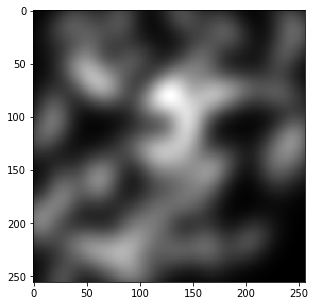

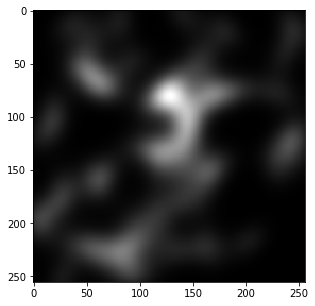

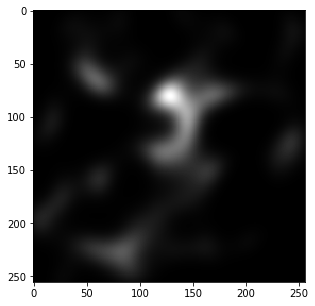

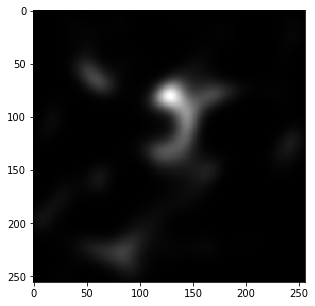

In [121]:
def random_pattern(power=3):
    gs = ig.Composite(operator=np.add,
                  generators=[ig.Gaussian(size=0.1,
                                          scale=0.02,
                                          x=ng.UniformRandom(seed=i+1)-0.5,
                                          y=ng.UniformRandom(seed=i+2)-0.5,
                                          orientation=np.pi*ng.UniformRandom(seed=i+3),
                                          aspect_ratio=1.0/0.71) for i in range(50)])
    ret = gs()
    ret = np.power(ret, power)
    ret = ret/np.max(ret) * 3.0
    
    return ret

def show_random_pattern(pattern):
    plt.figure(figsize=(10,5))
    plt.imshow(pattern, cmap='gray')
    plt.show()
    
for i in range(4):
    pattern = random_pattern(i+1)
    show_random_pattern(pattern)

In [ ]:
gs = ig.Composite(operator=np.add,
                  generators=[ig.Gaussian(size=0.1,
                                          x=ng.UniformRandom(seed=i+1)-0.5,
                                          y=ng.UniformRandom(seed=i+2)-0.5,
                                          orientation=np.pi*ng.UniformRandom(seed=i+3),
                                          aspect_ratio=1.0/0.71) for i in range(50)])

In [9]:
import random
import time 

test = []
iters = 1000

start = time.time()
for i in range(iters):
    # test.append(random.randint(0,2))
    test.append(random.random())
end = time.time()
print('total time: {} s'.format(end-start))

start = time.time()
test = np.random.randint(2, size=iters)
end = time.time()
print('total time: {} s'.format(end-start))

total time: 0.00029659271240234375 s
total time: 0.0002751350402832031 s


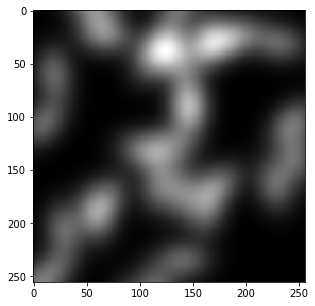

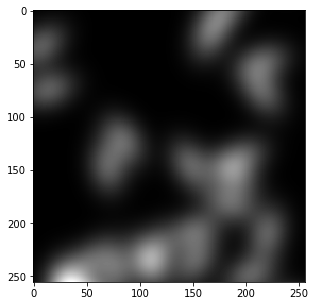

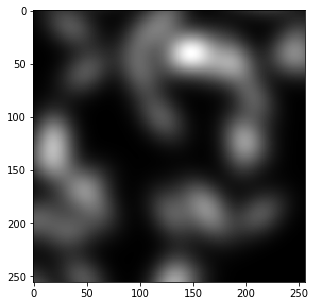

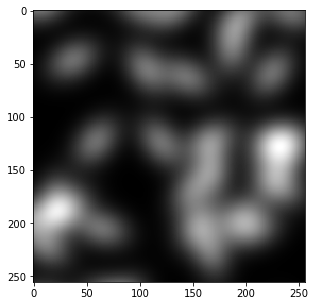

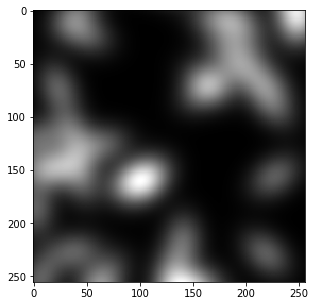

time: 1.6531763076782227s


In [122]:
s = time.time()
gs = ig.Composite(operator=np.add,
                  generators=[ig.Gaussian(size=0.1,
                                          scale=0.02,
                                          x=ng.UniformRandom(seed=i+1)-0.5,
                                          y=(ng.UniformRandom(seed=i+2)-0.5)*2.0,
                                          orientation=np.pi*ng.UniformRandom(seed=i+3),
                                          aspect_ratio=1.0/0.71) for i in range(50)])

for i in range(5):
    pattern = gs()
    show_random_pattern(pattern)
    
print('time: {}s'.format(time.time() - s))